[View in Colaboratory](https://colab.research.google.com/github/Nielspace/Incremental_Learning/blob/master/Banking_Dilemma/Bad_label_Detection.ipynb)

In [1]:
! pip3 install PyMySQL
!pip install sqlalchemy
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

In [0]:
user_name = 'dm_team1'
pwd = 'dm_team1123#'
host = '18.136.56.185'
port = '3306'
db = 'project_banking'

In [0]:
conn = create_engine('mysql+pymysql://'+user_name+':'+pwd+'@'+host+':'+port+'/'+db)
Cust_Account_query = "select * from Cust_Account"
Cust_Enquiry_query = "select * from Cust_Enquiry"
Cust_Demographics_query = "select * from Cust_Demographics"

In [0]:
cust_acc_df = pd.read_sql(Cust_Account_query,conn)
cust_enq_df = pd.read_sql(Cust_Enquiry_query,conn)
cust_dem_df = pd.read_sql(Cust_Demographics_query,conn)

dup_cust_acc_df = cust_acc_df
dup_cust_enq_df = cust_enq_df
dup_cust_dem_df = cust_dem_df

In [5]:
dup_cust_dem_df.feature_1.replace('',np.nan,inplace=True)
dup_cust_dem_df.replace('',np.nan,inplace=True)
print (dup_cust_dem_df.isnull().sum())
print('******************************')


dup_cust_acc_df.replace('',np.nan,inplace=True)
print (dup_cust_acc_df.isnull().sum())
print('******************************')


dup_cust_enq_df.replace('',np.nan,inplace=True)
print (dup_cust_enq_df.isnull().sum())

dt_opened          0
customer_no        0
entry_time        15
feature_1         15
feature_2       2836
feature_3       2836
feature_4         15
feature_5         15
feature_6         15
feature_7         15
feature_8      22635
feature_9      22635
feature_10     23845
feature_11        15
feature_12        15
feature_13     13004
feature_14      7733
feature_15        23
feature_16        27
feature_17     22869
feature_18     23878
feature_19        15
feature_20         0
feature_21        15
feature_22         0
feature_23        15
feature_24       640
feature_25        15
feature_26        15
feature_27      3637
               ...  
feature_51     11422
feature_52        15
feature_53     11610
feature_54        15
feature_55        15
feature_56        15
feature_57     21503
feature_58        15
feature_59        15
feature_60        15
feature_61     23887
feature_62        15
feature_63        15
feature_64        15
feature_65        15
feature_66        15
feature_67   

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in dup_cust_dem_df.columns:
    dup_cust_dem_df[col] = label_encoder.fit_transform(dup_cust_dem_df[col].astype(str))

In [7]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(dup_cust_dem_df)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [8]:
dup_cust_dem_df.isnull().sum()

dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
feature_5      0
feature_6      0
feature_7      0
feature_8      0
feature_9      0
feature_10     0
feature_11     0
feature_12     0
feature_13     0
feature_14     0
feature_15     0
feature_16     0
feature_17     0
feature_18     0
feature_19     0
feature_20     0
feature_21     0
feature_22     0
feature_23     0
feature_24     0
feature_25     0
feature_26     0
feature_27     0
              ..
feature_51     0
feature_52     0
feature_53     0
feature_54     0
feature_55     0
feature_56     0
feature_57     0
feature_58     0
feature_59     0
feature_60     0
feature_61     0
feature_62     0
feature_63     0
feature_64     0
feature_65     0
feature_66     0
feature_67     0
feature_68     0
feature_69     0
feature_70     0
feature_71     0
feature_72     0
feature_73     0
feature_74     0
feature_75     0
feature_76     0
feature_77     0
feature_78    

In [0]:
df = dup_cust_dem_df.drop(['dt_opened','customer_no','entry_time'],axis=1)

In [10]:
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from keras import optimizers

Using TensorFlow backend.


In [0]:
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Good", "Bad"]

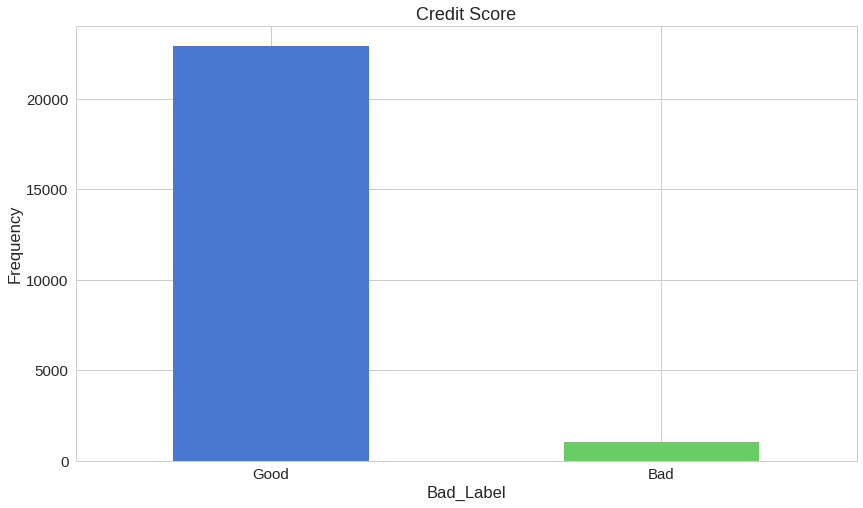

In [12]:
count_classes = pd.value_counts(df['Bad_label'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Credit Score")
plt.xticks(range(2), LABELS)
plt.xlabel("Bad_Label")
plt.ylabel("Frequency");

In [0]:
Bad = df[df.Bad_label == 1]
Good = df[df.Bad_label == 0]

In [14]:
print(Bad.shape)
print(Good.shape)

(1004, 80)
(22892, 80)


In [0]:
X_train, X_test = train_test_split(df, test_size=0.2)
X_train = X_train[X_train.Bad_label == 0]
X_train = X_train.drop(['Bad_label'], axis=1)

y_test = X_test['Bad_label']
X_test = X_test.drop(['Bad_label'], axis=1)

X_train = X_train.values
X_test = X_test.values

In [16]:
print(X_train.shape)
print(X_test.shape)


(18316, 79)
(4780, 79)


In [17]:
X_train.shape[1]

79

In [0]:
input_dim = X_train.shape[1]
encoding_dim = 32

input_layer = Input(shape=(input_dim,))

encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(784, activation="relu")(encoder)

decoder = Dense(784, activation='sigmoid')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)


In [19]:
nb_epoch = 100
batch_size = 32
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

autoencoder.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[checkpointer, tensorboard]).history

Train on 18316 samples, validate on 4780 samples
Epoch 1/100
18316/18316 [==============================] - 9s 484us/step - loss: -4003.6675 - acc: 0.2562 - val_loss: -6468.7090 - val_acc: 0.2419
Epoch 2/100
18316/18316 [==============================] - 9s 470us/step - loss: -6450.9485 - acc: 0.2524 - val_loss: -6473.3883 - val_acc: 0.2526
Epoch 3/100
18316/18316 [==============================] - 9s 471us/step - loss: -6453.3073 - acc: 0.2567 - val_loss: -6474.4879 - val_acc: 0.2582
Epoch 4/100
18316/18316 [==============================] - 9s 475us/step - loss: -6453.9340 - acc: 0.2600 - val_loss: -6474.8353 - val_acc: 0.2594
Epoch 5/100
18316/18316 [==============================] - 9s 466us/step - loss: -6454.1068 - acc: 0.2607 - val_loss: -6474.9400 - val_acc: 0.2603
Epoch 6/100
18316/18316 [==============================] - 9s 470us/step - loss: -6454.2155 - acc: 0.2613 - val_loss: -6475.0326 - val_acc: 0.2607
Epoch 7/100
18316/18316 [==============================] - 9s 470us/s

In [0]:
autoencoder = load_model('model.h5')

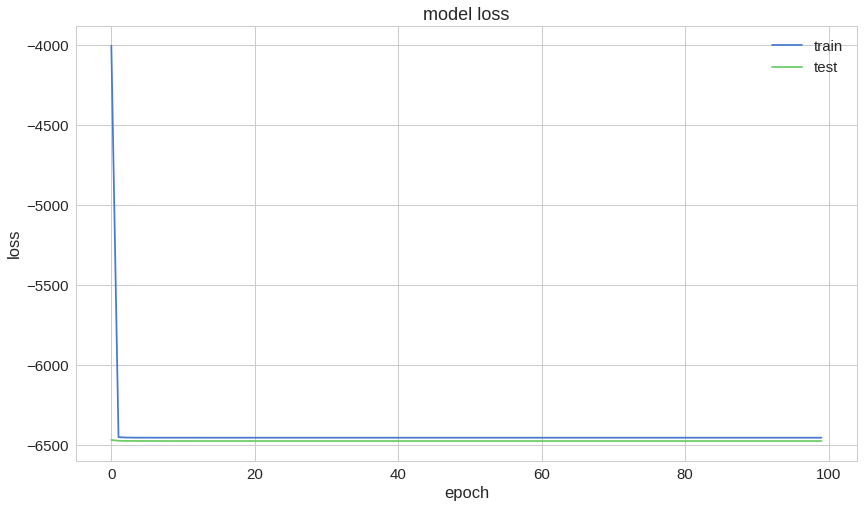

In [21]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [0]:
predictions = autoencoder.predict(X_test)

mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_label': y_test})

In [23]:
error_df.true_label.value_counts()

0    4576
1     204
Name: true_label, dtype: int64

In [24]:
error_df.describe()

,reconstruction_error,true_label
count,4.780000e+03,4780.000000
mean,1.814849e+06,0.042678
std,8.423771e+05,0.202151
min,9.066404e+04,0.000000
25%,1.151997e+06,0.000000
50%,1.667466e+06,0.000000
75%,2.410800e+06,0.000000
max,5.477366e+06,1.000000


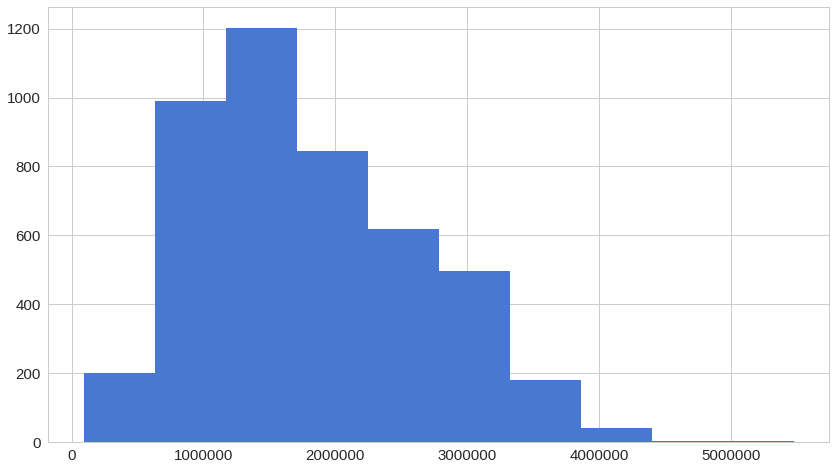

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_label']== 0) | (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

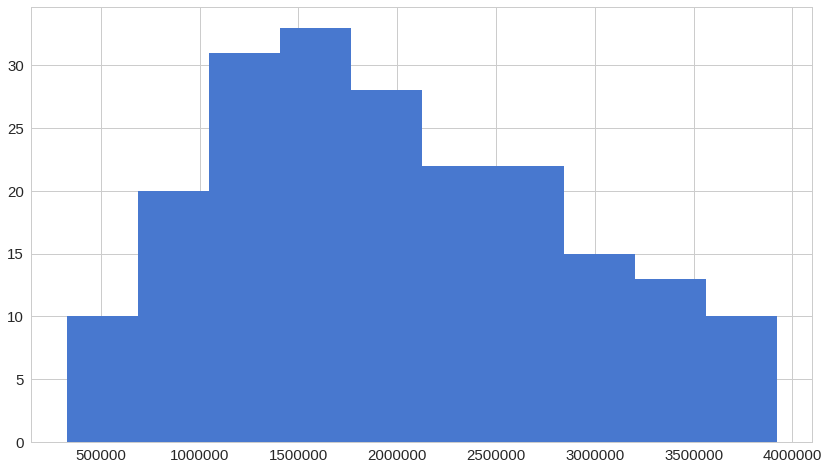

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
Bad_label_error_df = error_df[error_df['true_label'] == 1]
_ = ax.hist(Bad_label_error_df.reconstruction_error.values, bins=10)

In [0]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

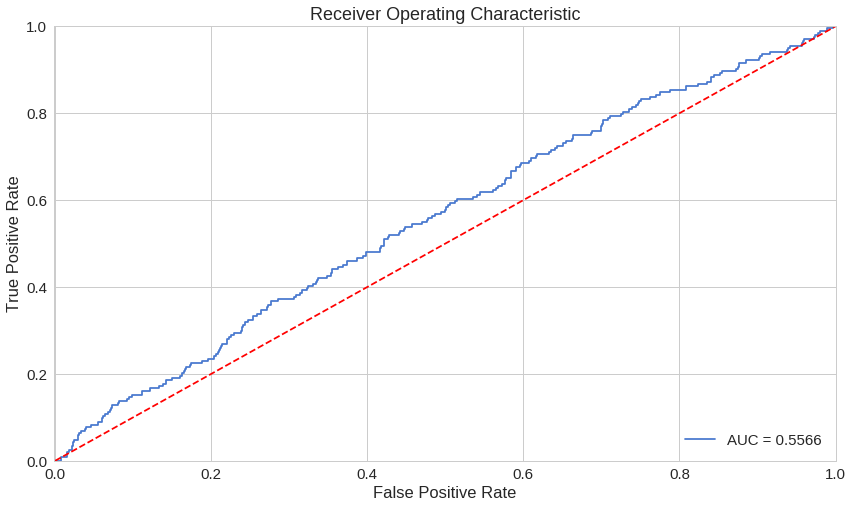

In [28]:
fpr, tpr, thresholds = roc_curve(error_df.true_label, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

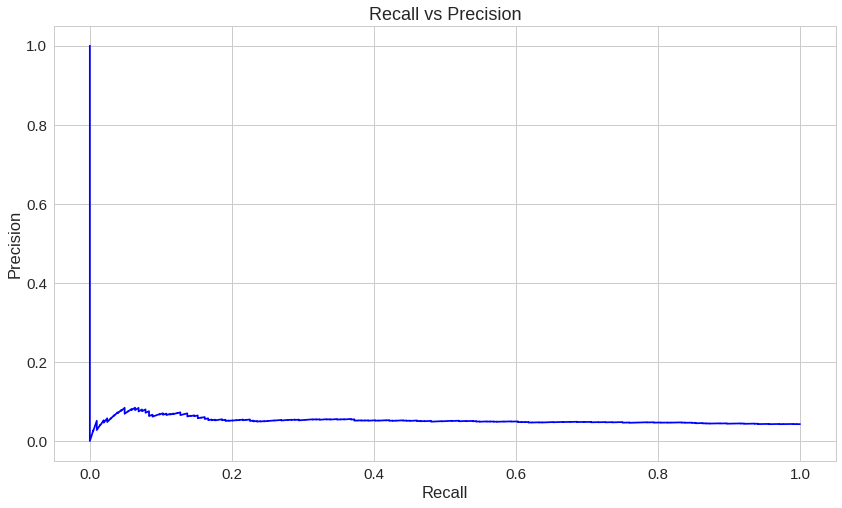

In [29]:
precision, recall, th = precision_recall_curve(error_df.true_label, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

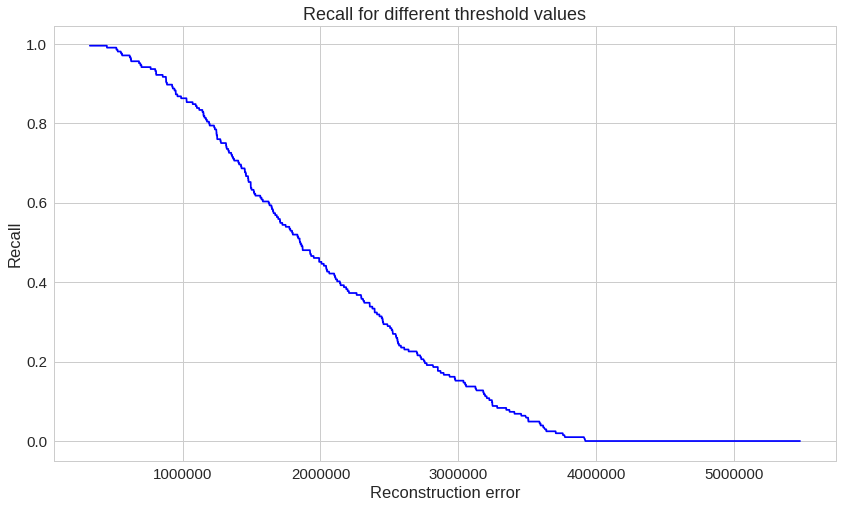

In [30]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

In [0]:
threshold = 2.9

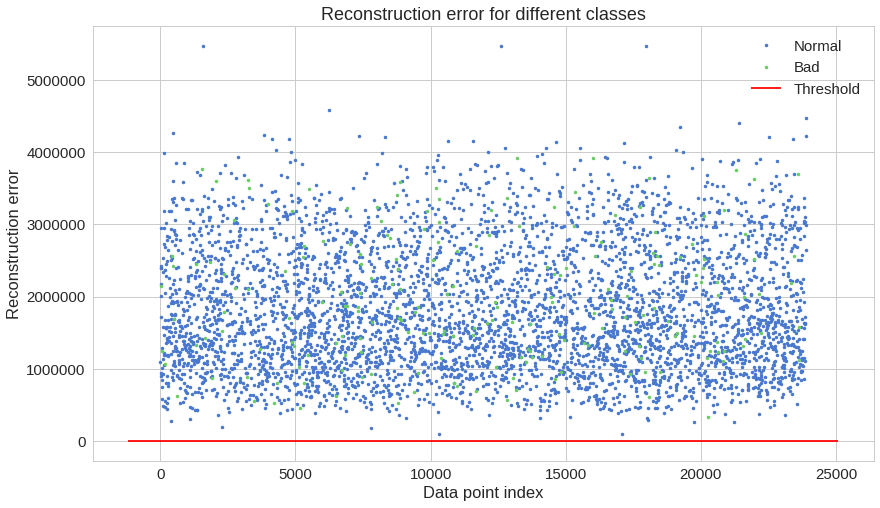

In [32]:
groups = error_df.groupby('true_label')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Bad" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

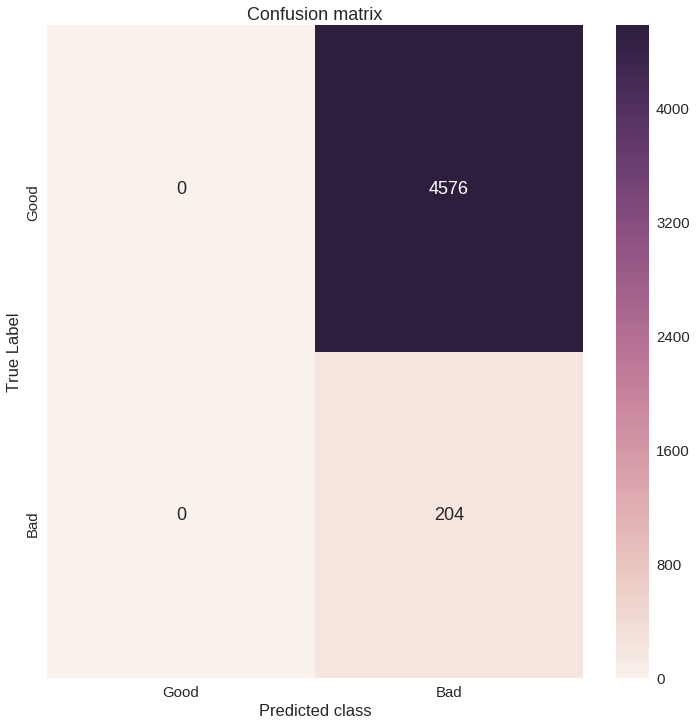

In [33]:
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_label, y_pred)

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted class')
plt.show()